In [2]:
 # This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from  sklearn.metrics import mean_squared_error

train = pd.read_csv("numerical_data.csv", sep=",")

In [20]:
 train.shape

(30001, 3)

In [21]:
train.head() 

,time,velocity,force
0,0.000,0.000000e+00,-0.000017
1,0.001,-7.040000e-09,-0.000017
2,0.002,-7.650000e-05,0.006806
3,0.003,-2.157000e-04,0.019206
4,0.004,-4.113000e-04,0.036630


In [22]:
 train.dtypes

time        float64
velocity    float64
force       float64
dtype: object

In [16]:
train.corr()


,time,velocity,force
time,1.00000,-0.014960,0.014950
velocity,-0.01496,1.000000,-0.999996
force,0.01495,-0.999996,1.000000


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [188]:
enc1=MinMaxScaler(feature_range=(0,1))



In [207]:
def Reshape_input(train,transform_only):
    timestep = 10
    #X ,y = train.iloc[:,:1],train.iloc[timestep:,2]
    X = train.iloc[:,:1]
    if transform_only:
        X= enc1.transform(X)
    else:
        X= enc1.fit_transform(X)
    X_3d = np.zeros((X.shape[0]-timestep,timestep,X.shape[1]))
    print(X_3d.shape)

    for i in range(X_3d.shape[0]):
        X_3d[i,:,:] = X[i:i+timestep,:]
    y=enc1.fit_transform(np.array(train["force"]).reshape(-1,1))
    return enc1, X_3d, y[10:]


In [208]:
enc1, X, y = Reshape_input(train,transform_only=False)

(29991, 10, 1)


In [209]:
X.shape

(29991, 10, 1)

In [210]:
#print(X)

In [211]:
y.shape

(29991, 1)

In [212]:
print(y)

[[0.50852651]
 [0.51048979]
 [0.51264524]
 ...
 [0.4993497 ]
 [0.4993497 ]
 [0.4993497 ]]


In [213]:
from keras.models import Sequential
from keras.layers import *
from keras.layers import LSTM
from keras.layers import Activation
from keras.optimizers import Adam, SGD
from keras.callbacks import *
model = Sequential()
model.add(LSTM(18, input_shape=(X.shape[1], X.shape[2]), recurrent_dropout= 0.1, activation='linear'))
#model.add(Dense(18,kernel_initializer='normal',activation='relu'))
#model.add(Dropout(0))
#model.add(Dense(1))
model.add(Dense(1,activation='linear'))
model.compile(SGD(lr=0.001, clipnorm=1.), loss='mean_squared_error')

checkpoint = ModelCheckpoint(filepath='model_lstm_yusra_weights.hdfs', save_weights_only=True,
                             monitor='val_loss',save_best_only=True)
EarlyStop = EarlyStopping(monitor='val_loss', min_delta=0, patience=4,
                          verbose=0, mode='auto')
RL = ReduceLROnPlateau(min_lr=0.00001,factor=0.3,patience=3)

In [214]:
history = model.fit(X, y, epochs=50, batch_size=256,validation_split=0.2,
                  verbose=1, shuffle=False,callbacks=[checkpoint,RL,EarlyStop])

Train on 23992 samples, validate on 5999 samples
Epoch 1/50
23992/23992 [==============================] - 5s 203us/step - loss: 0.1448 - val_loss: 0.0456
Epoch 2/50
23992/23992 [==============================] - 1s 21us/step - loss: 0.0839 - val_loss: 0.0215
Epoch 3/50
23992/23992 [==============================] - 1s 22us/step - loss: 0.0519 - val_loss: 0.0154
Epoch 4/50
23992/23992 [==============================] - 1s 22us/step - loss: 0.0356 - val_loss: 0.0166
Epoch 5/50
23992/23992 [==============================] - 1s 22us/step - loss: 0.0276 - val_loss: 0.0202
Epoch 6/50
23992/23992 [==============================] - 1s 22us/step - loss: 0.0235 - val_loss: 0.0238
Epoch 7/50
23992/23992 [==============================] - 1s 22us/step - loss: 0.0220 - val_loss: 0.0249


In [196]:
pp=model.predict(X)

In [197]:
mean_squared_error(pp,y)

0.014630236214163206

In [116]:
"""Step 2 - Make a dataframe with one  file from  Z=1.5"""

'Step 2 - Make a dataframe with one  file from  Z=1.5'

In [39]:
file= "input/LSTM_yusra_data/data/experimental_data.txt"

In [40]:
time=[]
feature1=[]
target=[]
try:
    f=open(file,"r")
    #read  all lines
    lines=f.readlines()
except:
    f=open(file,"r",encoding='utf-16')
    #read  all lines
    lines=f.readlines()
    #creatly  empty list  variables for  feature  1 ,  feature 2  and   target 
for x in lines:
    time.append(x.split('\t')[0])
    feature1.append(x.split('\t')[1])#splitting  by delimitator meaning \t and tak  first element  meaning  feat1 
    target.append((x.split('\t')[2]).split('\n')[0])
    f.close()

In [41]:
import pandas as pd
import numpy as np
test=pd.DataFrame({'Time':time, 'Feature1':np.array(feature1), 'target':np.array(target)})

In [42]:
test.head()

,Time,Feature1,target
0,0,0,0
1,0.001,0,0
2,0.002,0,0
3,0.003,0,0
4,0.004,0,0


In [49]:
test = test.apply(pd.to_numeric)

In [50]:
test.dtypes

Time        float64
Feature1    float64
target      float64
dtype: object

In [51]:
enc1, X, y = Reshape_input(test,transform_only=False)

(29991, 10, 1)


In [52]:
#X = X.reshape((X.shape[0], 1, X.shape[1]))

In [53]:
model.load_weights('model_lstm_yusra_weights.hdfs')

In [54]:
pred=model.predict(X)
    

In [55]:
mean_squared_error(pred,y)

15.274483904591058

In [56]:
len(y)

29991

In [57]:
len(pred)

29991

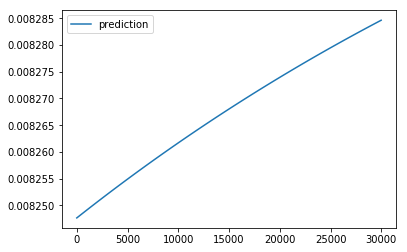

In [62]:
from matplotlib  import pyplot  as plt
plt.plot(list(pred), label='prediction')
#plt.plot(list(y), label='real')
plt.legend()
plt.show()

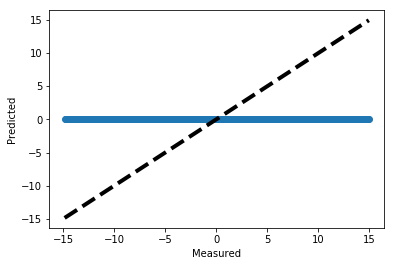

In [59]:
fig, ax=plt.subplots()
ax.scatter(y,pred)
ax.plot([y.min(), y.max()],[y.min(), y.max()],'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [60]:
pd.DataFrame({'real':list(y),'pred':list(pred)} ) .to_csv('train_data_lstmyusra.csv',index=False)

In [61]:


model.save('train_data_lstm_yusra.h5')

